# Fashion-MNIST Classification

Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from tensorflow import keras

Load the dataset

In [2]:
df = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = df.load_data()

Print the shape of data

In [3]:
print(X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Create a validation shape

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Create a list of class names for items in dataset

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Display some samples from the dataset

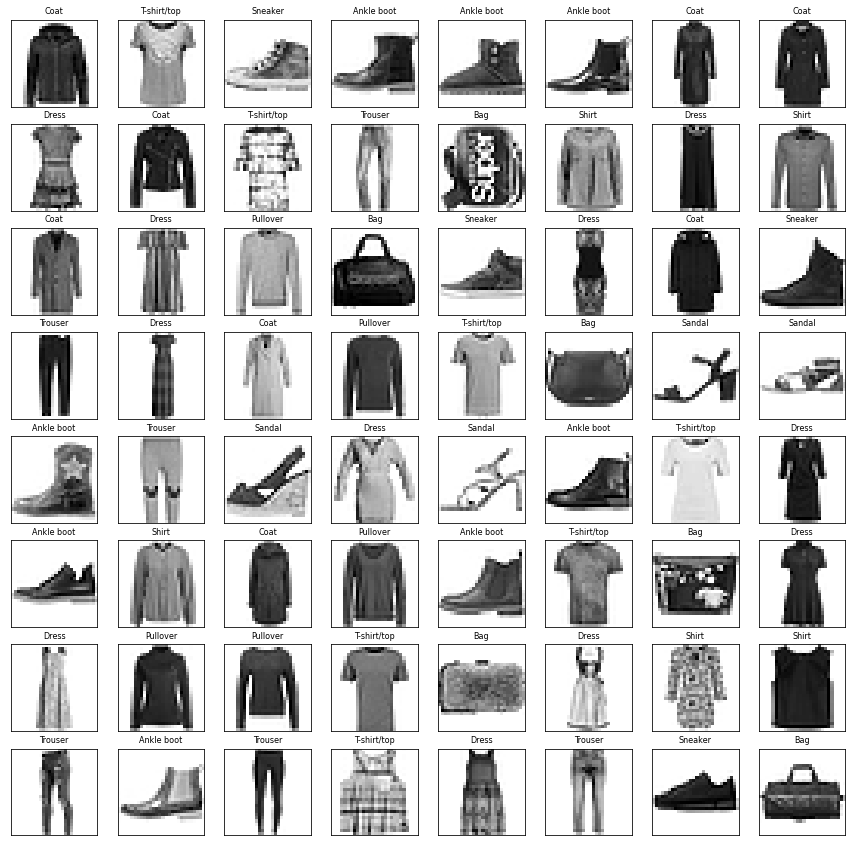

In [6]:
fig = plt.figure(figsize=(15, 15))

for i in range(64):
    digit = X_train[i]
    digit_image = digit.reshape(28, 28)
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digit_image, cmap=plt.cm.binary)
    ax.set_title(str(class_names[y_train[i]]), backgroundcolor= 'white', fontsize=8)

Create the model using Sequential API

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

Shows the model summary

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Compile the model

In [9]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd",
              metrics=["accuracy"])

Train the model

In [10]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7343 - accuracy: 0.7612 - val_loss: 0.5456 - val_accuracy: 0.8050
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4894 - accuracy: 0.8299 - val_loss: 0.4700 - val_accuracy: 0.8380
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4458 - accuracy: 0.8437 - val_loss: 0.4209 - val_accuracy: 0.8548
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4182 - accuracy: 0.8531 - val_loss: 0.4185 - val_accuracy: 0.8572
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3974 - accuracy: 0.8600 - val_loss: 0.3843 - val_accuracy: 0.8678
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3802 - accuracy: 0.8658 - val_loss: 0.3728 - val_accuracy: 0.8688
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3667 - accuracy: 0.8707 - val_loss: 0.3670 - val_accuracy:

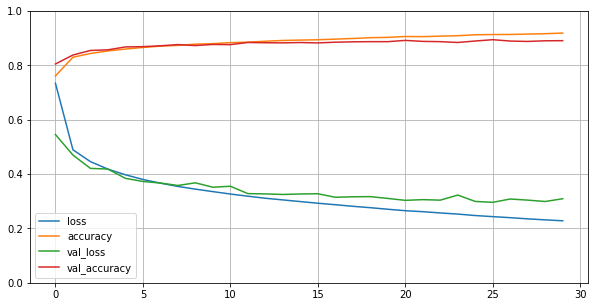

In [18]:
pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Evaluate the model on testing set

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 71.4085 - accuracy: 0.8423


[71.40850067138672, 0.8422999978065491]

## Save the model

In [13]:
model.save("model/clothes_clf_model.h5")